In [1]:
# Вариант 6.  (6, 8)
# А = x**2 + 1 / x,
# B = tg(x) + 1

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [3]:
def func_A(x: float = 0):
    return x**2 + (1 / x)


def func_B(x: float = 0):
    return math.tan(x) + 1


def func(x: float = 0):
    return func_A(x) - func_B(x)


def func_derivative(x: float = 0):
    return 2 * x - (1 / x) ** 2 - (1 / math.cos(x)) ** 2

In [4]:
# Draw graphics
def draw_func(func_, border_a: float = 0, border_b: float = 10, interval: float = 0.1):
    x_ = np.arange(border_a, border_b, interval)
    array = [[x, func_(x)] for x in x_]
    df = pd.DataFrame(array, columns=["x", "y"])
    print(len(x_), "points")
    sns.lineplot(data=df, x="x", y="y")

10000 points


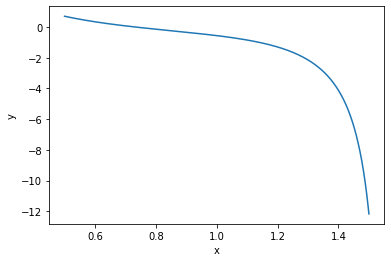

In [5]:
draw_func(func, 0.5, 1.5, 0.0001)

In [11]:
def bisection(func_, x1: float = 0.5, x2: float = 1.5, epsilon: float = 0.0001):
    df = pd.DataFrame(columns=["Xleft", "f(Xleft)", "Xright", "f(Xright)", "delta"])
    f1 = func_(x1)
    f2 = func_(x2)
    del_x = abs(x2 - x1)
    round_base = abs(round(math.log(epsilon, 10)))
    while del_x > epsilon:
        df.loc[len(df)] = list(map(lambda x: round(x, round_base + 1), [x1, f1, x2, f2, del_x]))
        middle = (x2 + x1) / 2
        f_middle = func_(middle)
        if f_middle * f1 < 0:
            x2 = middle
            f2 = f_middle
        else:
            x1 = middle
            f1 = f_middle
        del_x = abs(x2 - x1)
    df.loc[len(df)] = list(map(lambda x: round(x, round_base + 1), [x1, f1, x2, f2, del_x]))
    print(f"Results:\n" f"x = {round(middle, round_base+1)}, iterations = {len(df)}\n")
    with pd.option_context("display.max_rows", None, "display.max_columns", None):
        print(df)
        df.to_excel("/home/teadove/Desktop/lab1.xlsx")


bisection(func)

Results:
x = 0.73358, iterations = 15

      Xleft  f(Xleft)   Xright  f(Xright)    delta
0   0.50000   0.70370  1.50000  -12.18475  1.00000
1   0.50000   0.70370  1.00000   -0.55741  0.50000
2   0.50000   0.70370  0.75000   -0.03576  0.25000
3   0.62500   0.26914  0.75000   -0.03576  0.12500
4   0.68750   0.10606  0.75000   -0.03576  0.06250
5   0.71875   0.03305  0.75000   -0.03576  0.03125
6   0.71875   0.03305  0.73438   -0.00182  0.01562
7   0.72656   0.01549  0.73438   -0.00182  0.00781
8   0.73047   0.00681  0.73438   -0.00182  0.00391
9   0.73242   0.00249  0.73438   -0.00182  0.00195
10  0.73340   0.00033  0.73438   -0.00182  0.00098
11  0.73340   0.00033  0.73389   -0.00074  0.00049
12  0.73340   0.00033  0.73364   -0.00021  0.00024
13  0.73352   0.00006  0.73364   -0.00021  0.00012
14  0.73352   0.00006  0.73358   -0.00007  0.00006


In [15]:
def false_position(func_, x1: float = 0.5, x2: float = 1.5, epsilon: float = 0.0001):
    df = pd.DataFrame(columns=["Xleft", "f(Xleft)", "Xright", "f(Xright)", "delta"])
    f1 = func_(x1)
    f2 = func_(x2)
    del_x = abs(x2 - x1)
    round_base = abs(round(math.log(epsilon, 10)))
    while del_x > epsilon:
        df.loc[len(df)] = list(map(lambda x: round(x, round_base + 1), [x1, f1, x2, f2, del_x]))
        middle = x2 * f1 / (f1 - f2) + x1 * f2 / (f2 - f1)
        f_middle = func_(middle)
        if f_middle * f1 > 0:
            del_x = middle - x1
            x1 = middle
            f1 = f_middle
        else:
            del_x = x2 - middle
            x2 = middle
            f2 = f_middle
    df.loc[len(df)] = list(map(lambda x: round(x, round_base + 1), [x1, f1, x2, f2, del_x]))
    print(f"Results:\n" f"x = {round(middle, round_base+1)}\t iterations = {len(df)}\n")
    with pd.option_context("display.max_rows", None, "display.max_columns", None):
        print(df)
        df.to_excel("/home/teadove/Desktop/lab1.xlsx")


false_position(func)

Results:
x = 0.73299	 iterations = 38

      Xleft  f(Xleft)  Xright  f(Xright)    delta
0   0.50000   0.70370     1.5  -12.18475  1.00000
1   0.55460   0.49123     1.5  -12.18475  0.05460
2   0.59124   0.36958     1.5  -12.18475  0.03664
3   0.61799   0.28918     1.5  -12.18475  0.02675
4   0.63844   0.23181     1.5  -12.18475  0.02045
5   0.65452   0.18887     1.5  -12.18475  0.01608
6   0.66743   0.15568     1.5  -12.18475  0.01291
7   0.67793   0.12942     1.5  -12.18475  0.01050
8   0.68657   0.10831     1.5  -12.18475  0.00864
9   0.69374   0.09110     1.5  -12.18475  0.00717
10  0.69972   0.07694     1.5  -12.18475  0.00598
11  0.70474   0.06519     1.5  -12.18475  0.00502
12  0.70897   0.05539     1.5  -12.18475  0.00423
13  0.71255   0.04716     1.5  -12.18475  0.00358
14  0.71559   0.04022     1.5  -12.18475  0.00304
15  0.71817   0.03436     1.5  -12.18475  0.00258
16  0.72037   0.02939     1.5  -12.18475  0.00220
17  0.72224   0.02516     1.5  -12.18475  0.00188
18  0.72385

In [16]:
def secant(func_, x1: float = 0.5, x2: float = 1.5, epsilon: float = 0.0001):
    df = pd.DataFrame(columns=["Xleft", "f(Xleft)", "Xright", "f(Xright)", "delta"])
    f1 = func_(x1)
    f2 = func_(x2)
    del_x = abs(x2 - x1)
    round_base = abs(round(math.log(epsilon, 10)))
    iter_array = []
    while del_x > epsilon:
        df.loc[len(df)] = list(map(lambda x: round(x, round_base + 1), [x1, f1, x2, f2, del_x]))
        middle = x2 * f1 / (f1 - f2) + x1 * f2 / (f2 - f1)
        f_middle = func_(middle)
        x1 = x2
        f1 = f2
        x2 = middle
        f2 = f_middle
        del_x = abs(x2 - x1)
    df.loc[len(df)] = list(map(lambda x: round(x, round_base + 1), [x1, f1, x2, f2, del_x]))
    print(f"Results:\n" f"x = {round(middle, round_base+1)}, iterations = {len(df)}\n")
    with pd.option_context("display.max_rows", None, "display.max_columns", None):
        print(df)
        df.to_excel("/home/teadove/Desktop/lab1.xlsx")


secant(func)

Results:
x = 0.73355, iterations = 8

     Xleft  f(Xleft)   Xright  f(Xright)    delta
0  0.50000   0.70370  1.50000  -12.18475  1.00000
1  1.50000 -12.18475  0.55460    0.49123  0.94540
2  0.55460   0.49123  0.59124    0.36958  0.03664
3  0.59124   0.36958  0.70254    0.07032  0.11131
4  0.70254   0.07032  0.72870    0.01073  0.02615
5  0.72870   0.01073  0.73341    0.00031  0.00471
6  0.73341   0.00031  0.73355    0.00000  0.00014
7  0.73355   0.00000  0.73355    0.00000  0.00000


In [17]:
def newton_method(func_, func_derivative_, x1: float = 0.5, epsilon: float = 0.0001):
    df = pd.DataFrame(columns=["X", "f", "df", "delta"])
    del_x = epsilon * 2
    f1 = func(x1)
    df1 = func_derivative_(x1)
    iter_array = []
    round_base = abs(round(math.log(epsilon, 10)))
    while del_x > epsilon:
        df.loc[len(df)] = list(map(lambda x: round(x, round_base + 1), [x1, f1, df1, del_x]))
        f1 = func(x1)
        df1 = func_derivative_(x1)
        x2 = x1 - f1 / df1
        del_x = abs(x2 - x1)
        x1 = x2
    df.loc[len(df)] = list(map(lambda x: round(x, round_base + 1), [x1, f1, df1, del_x]))
    print(f"Results:\n" f"x = {round(x1, round_base+1)}, iterations = {len(df)}\n")
    with pd.option_context("display.max_rows", None, "display.max_columns", None):
        print(df)
        df.to_excel("/home/teadove/Desktop/lab1.xlsx")


newton_method(func, func_derivative)

Results:
x = 0.73355, iterations = 5

         X        f       df    delta
0  0.50000  0.70370 -4.29845  0.00020
1  0.66371  0.70370 -4.29845  0.16371
2  0.72836  0.16513 -2.55430  0.06465
3  0.73353  0.01150 -2.22389  0.00517
4  0.73355  0.00005 -2.20380  0.00002


In [10]:
if __name__ == "__main__":
    bisection(func)
    false_position(func)

Results:
x = 0.73358, iterations = 15

      Xleft  f(Xleft)   Xright  f(Xright)    delta
0   0.50000   0.70370  1.50000  -12.18475  1.00000
1   0.50000   0.70370  1.00000   -0.55741  0.50000
2   0.50000   0.70370  0.75000   -0.03576  0.25000
3   0.62500   0.26914  0.75000   -0.03576  0.12500
4   0.68750   0.10606  0.75000   -0.03576  0.06250
5   0.71875   0.03305  0.75000   -0.03576  0.03125
6   0.71875   0.03305  0.73438   -0.00182  0.01562
7   0.72656   0.01549  0.73438   -0.00182  0.00781
8   0.73047   0.00681  0.73438   -0.00182  0.00391
9   0.73242   0.00249  0.73438   -0.00182  0.00195
10  0.73340   0.00033  0.73438   -0.00182  0.00098
11  0.73340   0.00033  0.73389   -0.00074  0.00049
12  0.73340   0.00033  0.73364   -0.00021  0.00024
13  0.73352   0.00006  0.73364   -0.00021  0.00012
14  0.73352   0.00006  0.73358   -0.00007  0.00006
Results:
x = 0.73299	 iterations = 38

      Xleft  f(Xleft)  Xright  f(Xright)    delta
0   0.50000   0.70370     1.5  -12.18475  1.00000
1   0.